In [1]:
from tensorflow.keras.layers import Input, Dense, Flatten, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
# 2) Define size of image as per standard of VGG16
IMAGE_SIZE = [224, 224]

In [3]:
# 3) Provide the dataset path
train_path = 'datasets/Train'
test_path = 'datasets/Test'

In [6]:
# 4) Load the pre-trained model
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# 5) Do not train the existing weights
for layer in vgg.layers:
    layer.trainable = False

58889256/58889256 [==============================] - 97s 2us/step


In [7]:
# 6) Use glob to get the total number of classes
folders = glob(train_path + '/*')

In [8]:
# 7) Flatten the output and add a dense layer for prediction
x = Flatten()(vgg.output)
prediction = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=vgg.input, outputs=prediction)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
# 8) Use the image data generator
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(train_path, target_size=(224, 224), batch_size=32, class_mode='categorical')
test_set = test_datagen.flow_from_directory(test_path, target_size=(224, 224), batch_size=32, class_mode='categorical')

# Fit the model and store the history
r = model.fit(training_set, validation_data=test_set, epochs=20, steps_per_epoch=len(training_set), validation_steps=len(test_set))

Found 64 images belonging to 3 classes.
Found 58 images belonging to 3 classes.
Epoch 1/20
2/2 [==============================] - 35s 24s/step - loss: 1.7274 - accuracy: 0.3906 - val_loss: 2.4548 - val_accuracy: 0.3276
Epoch 2/20
2/2 [==============================] - 32s 22s/step - loss: 1.7835 - accuracy: 0.4062 - val_loss: 1.1032 - val_accuracy: 0.5690
Epoch 3/20
2/2 [==============================] - 31s 22s/step - loss: 0.8868 - accuracy: 0.7188 - val_loss: 1.8014 - val_accuracy: 0.6207
Epoch 4/20
2/2 [==============================] - 31s 22s/step - loss: 1.1973 - accuracy: 0.7031 - val_loss: 1.2313 - val_accuracy: 0.6379
Epoch 5/20
2/2 [==============================] - 31s 22s/step - loss: 0.4582 - accuracy: 0.7812 - val_loss: 0.5861 - val_accuracy: 0.7586
Epoch 6/20
2/2 [==============================] - 31s 22s/step - loss: 0.3981 - accuracy: 0.8594 - val_loss: 0.9741 - val_accuracy: 0.5690
Epoch 7/20
2/2 [==============================] - 32s 23s/step - loss: 0.5912 - accura

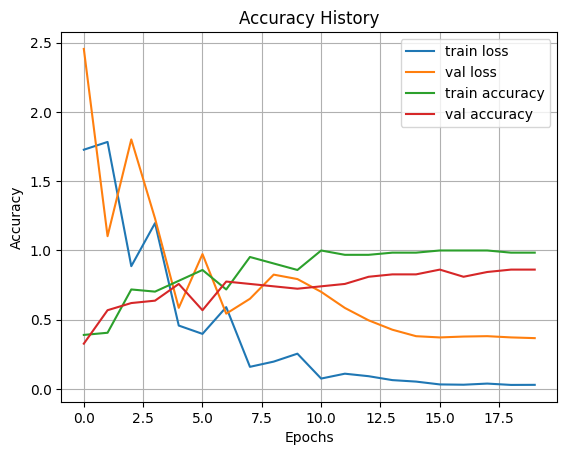

In [10]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.title('Loss History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.plot(r.history['accuracy'], label='train accuracy')
plt.plot(r.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy History')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.show()

In [11]:
# 10) Making and displaying predictions
# Get class labels from the training set
class_labels = {v: k for k, v in training_set.class_indices.items()}
print("Class Labels Mapping:", class_labels)

# Get some test images for prediction
test_images_paths = glob(test_path + '/*/*.jpg')
np.random.shuffle(test_images_paths)
test_images_to_predict = test_images_paths[:5]  # Predict on a small sample of 5 images

Class Labels Mapping: {0: 'audi', 1: 'lamborghini', 2: 'mercedes'}


1/1 [==============================] - 1s 747ms/step

Image: Test\mercedes\41.jpg
Actual Class: datasets
Predicted Class: mercedes (Confidence: 0.49)


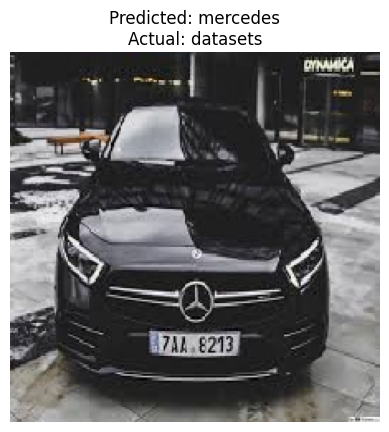

1/1 [==============================] - 0s 354ms/step

Image: Test\lamborghini\21.jpg
Actual Class: datasets
Predicted Class: lamborghini (Confidence: 0.86)


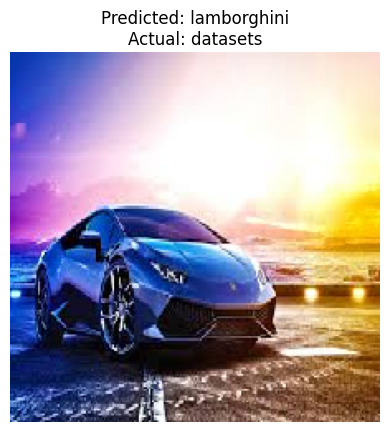

1/1 [==============================] - 0s 350ms/step

Image: Test\mercedes\29.jpg
Actual Class: datasets
Predicted Class: mercedes (Confidence: 0.99)


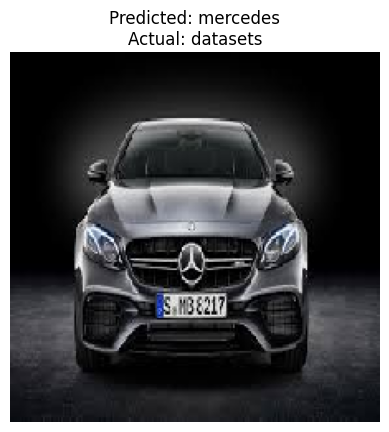

1/1 [==============================] - 0s 367ms/step

Image: Test\lamborghini\6.jpg
Actual Class: datasets
Predicted Class: lamborghini (Confidence: 0.99)


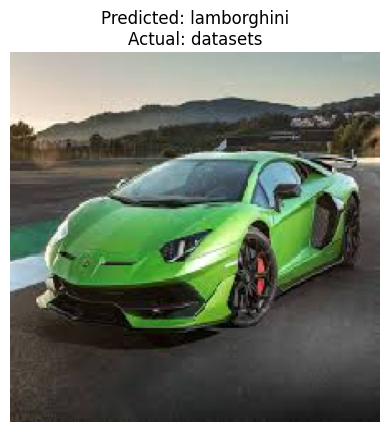

1/1 [==============================] - 0s 356ms/step

Image: Test\lamborghini\7.jpg
Actual Class: datasets
Predicted Class: lamborghini (Confidence: 1.00)


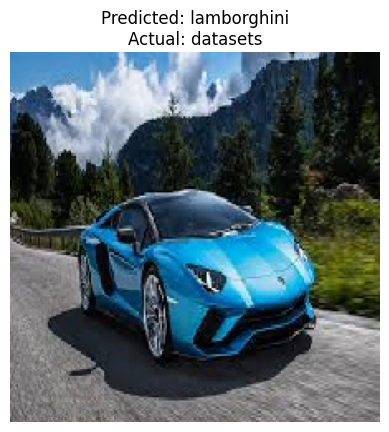

In [12]:
for img_path in test_images_to_predict:
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0  # Rescale the image

    # Make prediction
    prediction_result = model.predict(img_array)[0]
    predicted_class_index = np.argmax(prediction_result)
    predicted_class_name = class_labels[predicted_class_index]
    
    # Get the actual class name from the file path
    actual_class_name = img_path.split('/')[-2]

    # Display the results
    print(f"\nImage: {img_path.split('/')[-1]}")
    print(f"Actual Class: {actual_class_name}")
    print(f"Predicted Class: {predicted_class_name} (Confidence: {prediction_result[predicted_class_index]:.2f})")
    
    plt.imshow(img)
    plt.title(f"Predicted: {predicted_class_name}\nActual: {actual_class_name}")
    plt.axis('off')
    plt.show()